# TP1 : Génération de variables aléatoires

## G3 SDI - Estimation Avancée

Dans ce TP, on s'intéresse à la génération de variables aléatoires, i.e., la capacité de produire des échantillons finis de variables ou vecteurs aléatoires d'une loi donnée.
* Dans un premier temps, on suppose que l'on dispose d'un générateur de loi uniforme sur $[0,1]$ (avec Numpy, il est donné par `np.random.rand`). À partir de ce générateur, le but sera de générer des échantillons d'autres lois avec des méthodes simples, notamment la méthode de la transformée inverse.
* Dans un deuxième temps, on étudiera des méthodes plus sophistiquées (acceptation-rejet, échantillonnage d'importance).

Pour chaque question, **justifier brièvement la solution puis l'implémenter**. **Comparer avec la densité théorique** à l'aide d'histogrammes ou de KDE.

### Instructions

1. Renommez votre notebook sous la forme `tp1_Nom1_Nom2.ipynb`. 

2. Votre code, ainsi que toute sortie du code, doivent être commentés !

3. Déposez votre notebook sur Moodle dans la section prévue à cet effet avant la date limite.

<div style="background-color: rgba(255, 255, 0, 0.15); padding: 8px;">
Compte-rendu écrit par AMORRI, MILANO, 02/12/2025.
</div>

In [95]:
# Importing usual libraries
import numpy as np
from matplotlib import pyplot as plt
from sklearn.neighbors import KernelDensity

### Exercice 1 - Pour commencer : lois uniformes

**Q1**. À partir de $N$ échantillons d'une loi uniforme sur l'intervalle $[0,1]$, comment obtenir $N$ échantillons d'une loi uniforme sur l'intervalle $[a,b]$ ?

<div style="background-color: rgba(255, 255, 0, 0.15); padding: 8px;"\>

Pour obtenir $N$ échantillons d'une loi uniforme sur l'intervalle $[a,b]$ à partir de $N$ échantillons d'une loi uniforme sur $[0,1]$ (générés par np.random.rand), on doit appliquer une transformation linéaire aux échantillons de $[0,1]$.

$\mathbf{X} = a + (b-a)\mathbf{U}$

où :

  * $\mathbf{U}$ est la variable aléatoire uniforme sur $[0,1]$.
  * $\mathbf{X}$ est la variable aléatoire uniforme résultante sur $[a,b]$.
  * $(b-a)$ est le facteur d'**échelle** (ou "multiplication").
  * $a$ est le terme de **décalage** (ou "translation").

-----

#### **Explication de la Transformation**

1.  **Mise à l'échelle (Écart-type) :**
    La multiplication par $(b-a)$ ajuste la *longueur* de l'intervalle. L'intervalle initial $[0,1]$ est transformé en $[0, b-a]$.

      * Si $U=0$, alors $(b-a)U = 0$.
      * Si $U=1$, alors $(b-a)U = b-a$.

2.  **Décalage (Moyenne) :**
    L'ajout de $a$ décale l'ensemble de l'intervalle transformé $[0, b-a]$ pour qu'il commence à $a$, le transformant ainsi en $\mathbf{[a, b]}$.

      * Si $(b-a)U = 0$, alors $a + (b-a)U = a$.
      * Si $(b-a)U = b-a$, alors $a + (b-a)U = a + b - a = b$.
      
</div>

In [96]:
# Paramètres
N = 1000  # Nombre d'échantillons
a = 5     # Borne inférieure de l'intervalle [a, b]
b = 15    # Borne supérieure de l'intervalle [a, b]

# 1. Générer N échantillons de U ~ Uniforme[0, 1]
np.random.seed(42)
U = np.random.rand(N)

# 2. Appliquer la transformation pour obtenir X ~ Uniforme[a, b]
X = a + (b - a) * U

# X contient maintenant N échantillons d'une loi uniforme sur [5, 15]

# Vérification simple (facultatif)
print(f"Minimum de X: {X.min():.4f}")
print(f"Maximum de X: {X.max():.4f}")
print(f"Moyenne de X: {X.mean():.4f} (Théorique: (a+b)/2 = 10.0)")

Minimum de X: 5.0463
Maximum de X: 14.9972
Moyenne de X: 9.9026 (Théorique: (a+b)/2 = 10.0)


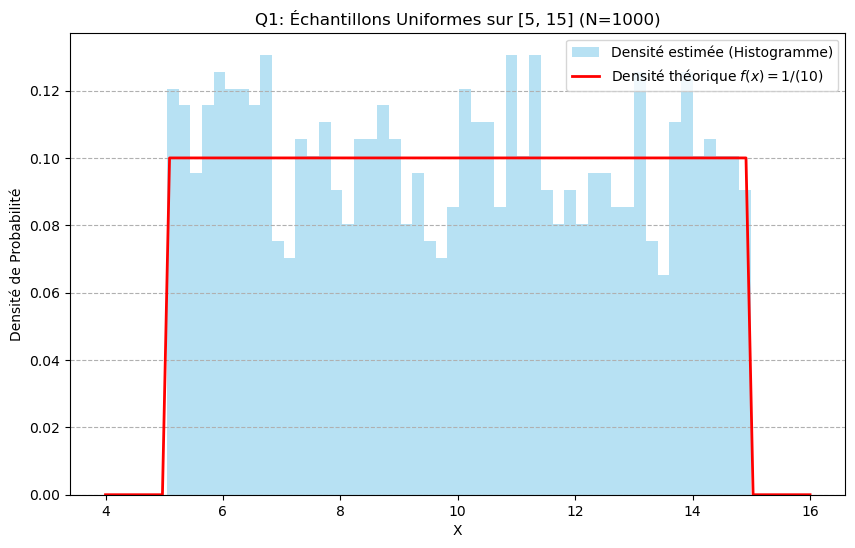

In [97]:
from scipy.stats import uniform

# --- Visualisation et Comparaison ---
plt.figure(figsize=(10, 6))

# Histogramme des échantillons
plt.hist(X, bins=50, density=True, alpha=0.6, color='skyblue', label='Densité estimée (Histogramme)')

# Densité théorique (PDF)
xmin, xmax = a - 1, b + 1
x_pdf = np.linspace(xmin, xmax, 100)
pdf_theorique = uniform.pdf(x_pdf, loc=a, scale=b-a)
plt.plot(x_pdf, pdf_theorique, 'r-', linewidth=2, label=f'Densité théorique $f(x) = 1/({b-a})$')

plt.title(f'Q1: Échantillons Uniformes sur [{a}, {b}] (N={N})')
plt.xlabel('X')
plt.ylabel('Densité de Probabilité')
plt.legend()
plt.grid(axis='y', linestyle='--')
plt.show()

**Q2**. Comment obtenir $N$ échantillons d'une loi uniforme sur le pavé $[a,b] \times [c,d]$ ?

<div style="background-color: rgba(255, 255, 0, 0.15); padding: 8px;">
Votre réponse ici
</div>

In [98]:
import numpy as np

# 1. Définir les paramètres du pavé
N = 1000  # Nombre d'échantillons
a, b = 1, 5   # Intervalle X
c, d = 10, 20 # Intervalle Y

# 2. Générer les échantillons X
# Transformation: a + (b - a) * U_x
X = a + (b - a) * np.random.rand(N)

# 3. Générer les échantillons Y (indépendamment)
# Transformation: c + (d - c) * U_y
Y = c + (d - c) * np.random.rand(N)

# 4. Combiner les résultats en paires (N, 2)
echantillons = np.column_stack((X, Y))
# ou : echantillons = np.array([X, Y]).T

# Vérification (facultatif)
print(f"Échantillons générés. Taille: {echantillons.shape}")
print(f"Plage X (min, max): ({X.min():.2f}, {X.max():.2f})")
print(f"Plage Y (min, max): ({Y.min():.2f}, {Y.max():.2f})")

Échantillons générés. Taille: (1000, 2)
Plage X (min, max): (1.01, 5.00)
Plage Y (min, max): (10.00, 19.98)


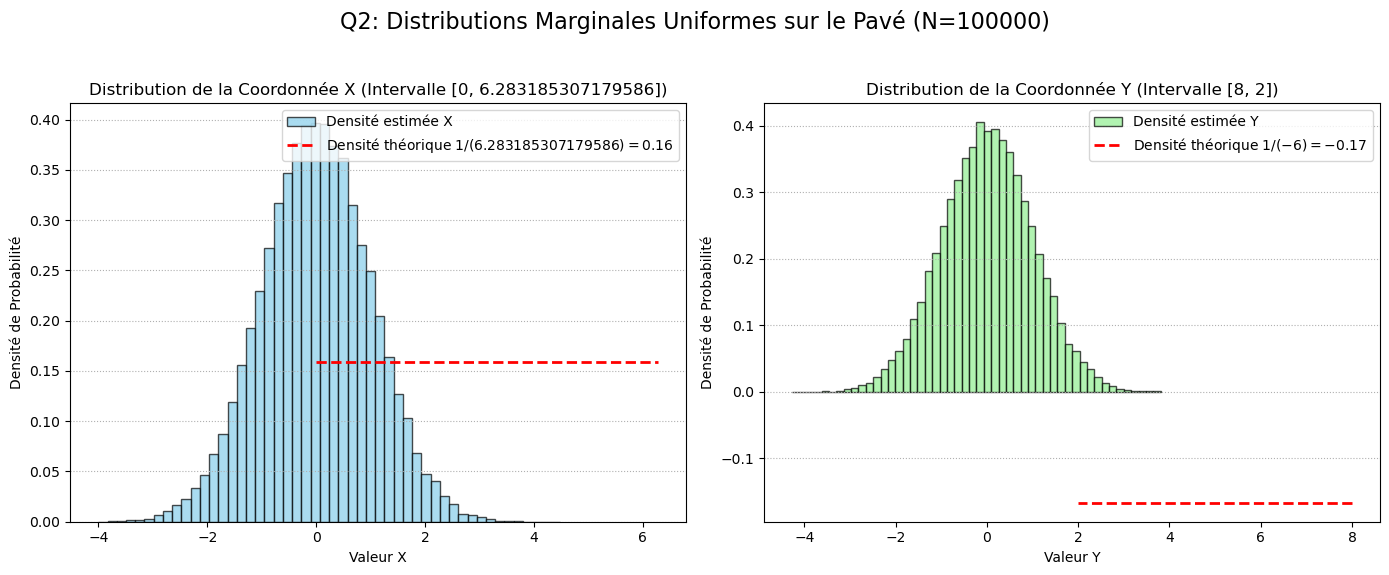

In [150]:
# Visualisation des deux histogrammes superposés (facultatif: en réalité, ils sont séparés pour plus de clarté) 

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))
fig.suptitle(f'Q2: Distributions Marginales Uniformes sur le Pavé (N={N})', fontsize=16)

# Histogramme pour la dimension X 
ax1.hist(X, bins=50, density=True, alpha=0.7, color='skyblue', edgecolor='black', label='Densité estimée X')
# Densité théorique X: 1/(b-a)
pdf_x_theorique = 1 / (b - a)
ax1.hlines(pdf_x_theorique, a, b, color='red', linestyle='--', linewidth=2, label=f'Densité théorique $1/({b-a})={pdf_x_theorique:.2f}$')
ax1.set_title(f'Distribution de la Coordonnée X (Intervalle [{a}, {b}])')
ax1.set_xlabel('Valeur X')
ax1.set_ylabel('Densité de Probabilité')
ax1.legend()
ax1.grid(axis='y', linestyle=':')


# Histogramme pour la dimension Y 
ax2.hist(Y, bins=50, density=True, alpha=0.7, color='lightgreen', edgecolor='black', label='Densité estimée Y')
# Densité théorique Y: 1/(d-c)
pdf_y_theorique = 1 / (d - c)
ax2.hlines(pdf_y_theorique, c, d, color='red', linestyle='--', linewidth=2, label=f'Densité théorique $1/({d-c})={pdf_y_theorique:.2f}$')
ax2.set_title(f'Distribution de la Coordonnée Y (Intervalle [{c}, {d}])')
ax2.set_xlabel('Valeur Y')
ax2.set_ylabel('Densité de Probabilité')
ax2.legend()
ax2.grid(axis='y', linestyle=':')

plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Ajuster pour le suptitle
plt.show()

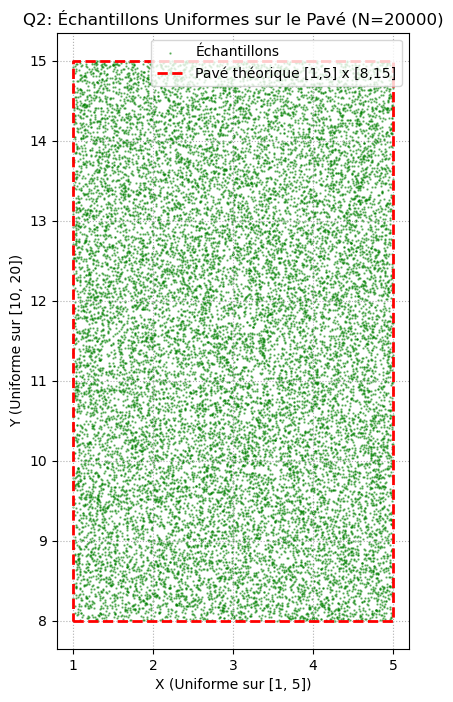

In [100]:
# --- Paramètres ---
N = 20000  # Nombre d'échantillons
a, b = 1, 5   # Intervalle X
c, d = 8, 15 # Intervalle Y

# 1. Générer les échantillons U_x et U_y ~ U(0,1)
U_x = np.random.rand(N)
U_y = np.random.rand(N)

# 2. Transformation
X = a + (b - a) * U_x
Y = c + (d - c) * U_y

# --- Visualisation et Comparaison ---
plt.figure(figsize=(10, 8))

# Scatter plot des échantillons
plt.scatter(X, Y, s=0.5, alpha=0.5, color='green', label='Échantillons')

# Contour théorique du pavé
plt.plot([a, b, b, a, a], [c, c, d, d, c], 'r--', linewidth=2, label=f'Pavé théorique [{a},{b}] x [{c},{d}]')

plt.title(f'Q2: Échantillons Uniformes sur le Pavé (N={N})')
plt.xlabel('X (Uniforme sur [1, 5])')
plt.ylabel('Y (Uniforme sur [10, 20])')
plt.legend()
plt.gca().set_aspect('equal', adjustable='box') # Pour un meilleur rendu visuel
plt.grid(linestyle=':')
plt.show()

**Q3**. À partir de $N$ échantillons de loi uniforme sur l'intervalle $[0,1]$, comment obtenir $N$ échantillons de loi uniforme discrète sur $\{1, ..., K\}$ ?

<div style="background-color: rgba(255, 255, 0, 0.15); padding: 8px;">

La transformation consiste à diviser l'intervalle $[0,1]$ en $K$ sous-intervalles de longueur $1/K$ et à mapper chaque intervalle à un entier. L'opération est :$$\mathbf{X} = \lfloor K \mathbf{U} \rfloor + 1$$où $\lfloor \cdot \rfloor$ est la fonction partie entière. La probabilité théorique pour chaque entier $k \in \{1, \dots, K\}$ est $P(X=k) = \frac{1}{K}$
</div>

In [151]:
N = 10  # Nombre d'échantillons
K = 6      # Résultats possibles {1, 2, 3, 4, 5, 6}

# Générer les échantillons U ~ U(0,1)
U = np.random.rand(N)

# Transformation pour obtenir X ~ Uniforme Discrète
# X = floor(K * U) + 1
X = np.floor(K * U).astype(int) + 1
print(U,X)

[0.09753621 0.58489389 0.55547815 0.19334002 0.86158449 0.5114896
 0.82936399 0.25836741 0.52287584 0.24404769] [1 4 4 2 6 4 5 2 4 2]


[4 4 4 ... 6 5 3]


/var/folders/pd/3sqbd7bj1rz10m02lgmm5zrh0000gn/T/ipykernel_65587/3664472564.py:26: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "r--" (-> linestyle='--'). The keyword argument will take precedence.
  plt.plot(x_theorique, y_theorique, 'r--', marker='o', linestyle='None', label=f'Probabilité théorique $1/K = {probabilite_theorique:.3f}$')


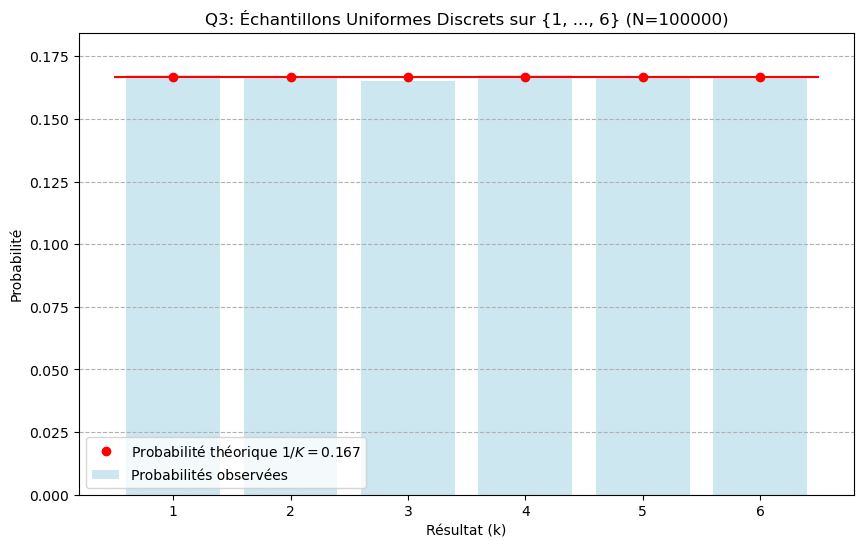

In [102]:
# Paramètres 
N = 100000  # Nombre d'échantillons
K = 6      # Résultats possibles {1, 2, 3, 4, 5, 6}

# 1. Générer les échantillons U ~ U(0,1)
U = np.random.rand(N)

# 2. Transformation pour obtenir X ~ Uniforme Discrète
# X = floor(K * U) + 1
X = np.floor(K * U).astype(int) + 1
print(X)
# Visualisation et Comparaison
plt.figure(figsize=(10, 6))

# Calculer les fréquences observées
valeurs, comptes = np.unique(X, return_counts=True)
probabilites_observees = comptes / N

# Probabilité théorique
probabilite_theorique = 1 / K
x_theorique = np.arange(1, K + 1)
y_theorique = np.full(K, probabilite_theorique)

# Diagramme en barres pour la loi discrète
plt.bar(valeurs, probabilites_observees, width=0.8, alpha=0.6, color='lightblue', label='Probabilités observées')
plt.plot(x_theorique, y_theorique, 'r--', marker='o', linestyle='None', label=f'Probabilité théorique $1/K = {probabilite_theorique:.3f}$')
plt.hlines(probabilite_theorique, 0.5, K + 0.5, color='red', linestyle='-', linewidth=1.5)

plt.title(f'Q3: Échantillons Uniformes Discrets sur {{1, ..., {K}}} (N={N})')
plt.xlabel('Résultat (k)')
plt.ylabel('Probabilité')
plt.xticks(valeurs)
plt.ylim(0, max(probabilites_observees) * 1.1)
plt.legend()
plt.grid(axis='y', linestyle='--')
plt.show()

### Exercice 2 - Méthode de la transformée inverse

Soit $X$ une variable aléatoire réelle de fonction de répartition $F$ (rappel : $F$ est une fonction croissante de 
$\mathbb{R}$ dans $[0,1]$, et "càdlàg", mais pas nécessairement bijective). On définit la **fonction inverse généralisée** $F^{-1}$ de $F$ par :
$$\forall~u \in [0,1],~F^{-1}(u) = \inf\{x \in \mathbb{R}, F(x) \geq u\}.$$

Cette fonction conïncide avec l'inverse classique quand $F$ est bijective (attention même si $F$ est continue elle n'est pas nécessairement bijective, il peut y avoir des plateaux). On a la proposition suivante :

<div style="background-color: rgba(255, 0, 0, 0.15); padding: 8px;">

Si $U$ suit la loi uniforme sur l'intervalle $[0,1]$, alors la v.a. $F^{-1}(U)$ a pour fonction de répartition $F$ (et donc la même loi que $X$).
</div>

Cela donne donc la méthode de la **transformée inverse** ; Si l'on connait explicitement la fonction £$F^{-1}$, on peut simuler de n'importe quelle variable aléatoire réelle à partir d'un échantillon de loi uniforme.

**Q1**. À l'aide de cette méthode, simuler $N$ échantillons d'une loi exponentielle de paramètre $\lambda$.

<div style="background-color: rgba(255, 255, 0, 0.15); padding: 8px;">

#### Simulation d'une loi exponentielle par la Transformée Inverse

Pour simuler $N$ échantillons d'une loi exponentielle $X \sim \mathcal{E}(\lambda)$, on utilise la méthode de la **Transformée Inverse**.

#### Principe

Il suffit de générer $N$ échantillons $X_i = F^{-1}(U_i)$, où $U_i$ suit une loi uniforme $\mathcal{U}(0,1)$ et $F^{-1}$ est la fonction inverse généralisée de la fonction de répartition de la loi exponentielle.

#### Calcul de $F^{-1}(u)$

La fonction de répartition est $F(x) = 1 - e^{-\lambda x}$ pour $x \geq 0$. On cherche $x$ tel que $u = F(x)$.

$$u = 1 - e^{-\lambda x}$$

**Isolation de $x$ :**
1.  On isole l'exponentielle : $e^{-\lambda x} = 1 - u$
2.  On applique le logarithme : $-\lambda x = \ln(1 - u)$
3.  On obtient la fonction inverse :
    $$F^{-1}(u) = x = -\frac{1}{\lambda} \ln(1 - u)$$

**Note :** Dans la pratique, puisque $U \sim \mathcal{U}(0,1)$ implique que $1-U \sim \mathcal{U}(0,1)$, on utilise souvent la formule équivalente et plus simple : $F^{-1}(U) = -\frac{1}{\lambda} \ln(U)$.

</div>

In [103]:
N = 100000 
l = 3 # Paramètre lambda

U = np.random.rand(N)

# Générer les variables F inverse
X = (-1/l) * np.log(U)# ou log(1-U)

# Vérification de Monte-Carlo
moyenne_empirique = np.mean(X)
variance_empirique = np.var(X)

print(f"Échantillons générés : {N}")
print("--- Vérification ---")
print(f"Moyenne théorique (1/λ) : {1/l:.4f}")
print(f"Moyenne empirique : {moyenne_empirique:.4f}")
print(f"Variance théorique (1/λ²) : {1/l**2:.4f}")
print(f"Variance empirique : {variance_empirique:.4f}")

Échantillons générés : 100000
--- Vérification ---
Moyenne théorique (1/λ) : 0.3333
Moyenne empirique : 0.3323
Variance théorique (1/λ²) : 0.1111
Variance empirique : 0.1108


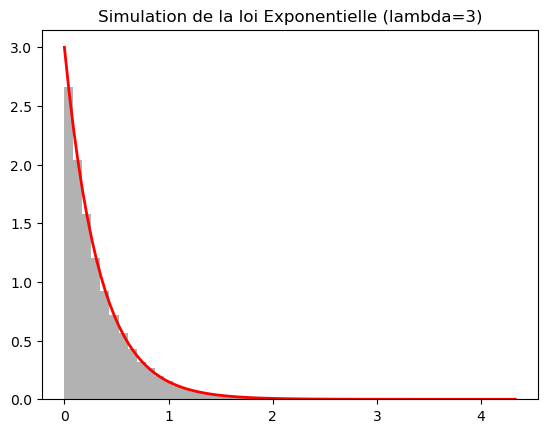

In [104]:
import matplotlib.pyplot as plt
plt.hist(X, bins=50, density=True, alpha=0.6, color='grey')
# Ajouter la densité théorique (lambda * exp(-lambda * x)) pour comparaison
x_range = np.linspace(0, max(X), 100)
pdf_theorique = 3 * np.exp(-3 * x_range)
plt.plot(x_range, pdf_theorique, 'r-', linewidth=2)
plt.title("Simulation de la loi Exponentielle (lambda=3)")
plt.show()

**Q2**. Quelles sont d'après vous les limitations de la méthode de la transformée inverse ?

<div style="background-color: rgba(255, 255, 0, 0.15); padding: 8px;">

### Limitations de la méthode de la transformée inverse

#### 1. Difficulté ou Impossibilité d'Inverser $F(x)$

La limitation la plus critique est mathématique. La MTI nécessite de déterminer la forme **analytique explicite** de la fonction inverse généralisée $F^{-1}(u)$.

* **Absence de forme explicite :** Pour de nombreuses lois de probabilité courantes (et complexes), la fonction de répartition $F(x)$ ne peut pas être exprimée de manière simple ou fermée (avec des fonctions mathématiques élémentaires). Par conséquent, il est **impossible** d'en dériver une formule $F^{-1}(u)$ simple à coder.
    * **Exemples courants :** La loi **Normale** (Gaussienne), la loi **Gamma**, la loi **Bêta** et la loi **t de Student** n'ont pas de $F^{-1}(u)$ explicite. Pour ces lois, d'autres méthodes de simulation (comme la méthode de Box-Muller pour la Normale ou les méthodes de rejet) sont utilisées.

#### 2. Complexité de Calcul de $F^{-1}(u)$

Même si $F^{-1}(u)$ existe, sa forme peut être **très complexe** et impliquer des calculs coûteux (par exemple, des résolutions numériques itératives).

* **Lois discrètes :** Pour une loi discrète avec un grand nombre de valeurs possibles, $F^{-1}(u)$ implique souvent de parcourir une longue liste de probabilités cumulées pour trouver l'intervalle où $u$ se situe. Cela peut être lent par rapport à d'autres algorithmes. 
* **Performance :** Le calcul de fonctions complexes comme le logarithme ($\ln$) est généralement plus lent que les opérations arithmétiques de base, ce qui peut impacter la vitesse de simulation pour de très grands échantillons.

#### 3. Exigences d'Indépendance

La MTI produit des échantillons **indépendants** si et seulement si les échantillons uniformes $U_i$ sont indépendants.

* **Corrélation :** La MTI est principalement conçue pour générer des variables aléatoires indépendantes. Elle n'est pas directement applicable si on veut simuler des variables qui sont **corrélées** entre elles selon une structure spécifique. Pour cela, il faut des techniques supplémentaires (comme l'utilisation de la décomposition de Cholesky).

</div>

### Exercice 3 - Méthode de Box-Müller

On a la proposition suivante :

<div style="background-color: rgba(255, 0, 0, 0.15); padding: 8px;">

Soit $R \sim \text{Exp}(1/2)$ et $\Theta \sim U([0, 2 \pi])$ deux variables aléatoires indépendantes.
    
Alors $X = \sqrt{R} \cos(\Theta)$ et $Y = \sqrt{R} \sin(\Theta)$ sont deux variables indépendantes de loi $\mathcal{N}(0,1)$.
</div>

Cette méthode est connue comme la méthode de **Box-Müller** (1958), et est l'une des méthodes de référence pour générer des variables aléatoires normales.

**Q1 (Bonus)**. Montrer la proposition.

<div style="background-color: rgba(255, 255, 0, 0.15); padding: 8px;">



### 1. Les Variables et Hypothèses

On définit le couple de variables $(X, Y)$ par :
$$\begin{cases} X = \sqrt{R} \cos(\Theta) \\ Y = \sqrt{R} \sin(\Theta) \end{cases}$$
où :
* $R \sim \text{Exp}(1/2)$ (Loi Exponentielle de paramètre $\lambda = 1/2$).
* $\Theta \sim \mathcal{U}([0, 2\pi])$ (Loi Uniforme sur $[0, 2\pi]$).
* $R$ et $\Theta$ sont **indépendantes**.

#### A. Densité du Couple $(R, \Theta)$

Puisque $R$ et $\Theta$ sont indépendantes, la densité conjointe $f_{R, \Theta}(r, \theta)$ est le produit des densités marginales $f_R(r)$ et $f_\Theta(\theta)$.

1.  **Densité de $R \sim \text{Exp}(1/2)$ :**
    $$f_R(r) = \frac{1}{2} e^{-r/2}, \quad \text{pour } r > 0.$$
2.  **Densité de $\Theta \sim \mathcal{U}([0, 2\pi])$ :**
    $$f_\Theta(\theta) = \frac{1}{2\pi}, \quad \text{pour } \theta \in [0, 2\pi].$$

Donc, la densité conjointe $f_{R, \Theta}(r, \theta)$ est :
$$f_{R, \Theta}(r, \theta) = \frac{1}{2} e^{-r/2} \cdot \frac{1}{2\pi} = \frac{1}{4\pi} e^{-r/2}, \quad \text{pour } r > 0, \theta \in [0, 2\pi].$$

---

### 2. Changement de Variables

Nous allons passer des coordonnées polaires $(R, \Theta)$ aux coordonnées cartésiennes $(X, Y)$.

#### A. La Transformation Inverse

Nous devons exprimer $R$ et $\Theta$ en fonction de $X$ et $Y$ :
$$\begin{cases} R = X^2 + Y^2 \\ \Theta = \arctan\left(\frac{Y}{X}\right) + C \end{cases}$$
où $C$ dépend du quadrant pour couvrir l'intervalle $[0, 2\pi]$.

Pour le changement de variables en densité, nous n'avons besoin que de $R$ et $\Theta$ en fonction de $X$ et $Y$, et du **Jacobien** de la transformation inverse.

#### B. Le Jacobien $J$

La densité $f_{X, Y}(x, y)$ est donnée par :
$$f_{X, Y}(x, y) = f_{R, \Theta}(R(x, y), \Theta(x, y)) \cdot |J^{-1}|$$
où $J^{-1}$ est le déterminant de la matrice Jacobienne de la transformation $(X, Y) \mapsto (R, \Theta)$.

Il est plus facile de calculer le Jacobien $J$ de la transformation directe $(R, \Theta) \mapsto (X, Y)$ et de prendre son inverse : $J^{-1} = 1/J$.

Le Jacobien $J$ est :
$$J = \det \begin{pmatrix} \frac{\partial X}{\partial R} & \frac{\partial X}{\partial \Theta} \\ \frac{\partial Y}{\partial R} & \frac{\partial Y}{\partial \Theta} \end{pmatrix}$$

Calcul des dérivées partielles :
$$\begin{cases} \frac{\partial X}{\partial R} = \frac{1}{2\sqrt{R}} \cos(\Theta) \\ \frac{\partial X}{\partial \Theta} = -\sqrt{R} \sin(\Theta) \\ \frac{\partial Y}{\partial R} = \frac{1}{2\sqrt{R}} \sin(\Theta) \\ \frac{\partial Y}{\partial \Theta} = \sqrt{R} \cos(\Theta) \end{cases}$$

Calcul du déterminant $J$ :
$$\begin{aligned} J &= \left(\frac{1}{2\sqrt{R}} \cos(\Theta)\right) \left(\sqrt{R} \cos(\Theta)\right) - \left(-\sqrt{R} \sin(\Theta)\right) \left(\frac{1}{2\sqrt{R}} \sin(\Theta)\right) \\ &= \frac{1}{2} \cos^2(\Theta) - \left(-\frac{1}{2} \sin^2(\Theta)\right) \\ &= \frac{1}{2} (\cos^2(\Theta) + \sin^2(\Theta)) \\ &= \frac{1}{2} \end{aligned}$$

Le déterminant du Jacobien inverse est donc : $|J^{-1}| = \left|\frac{1}{J}\right| = \left|\frac{1}{1/2}\right| = 2$.


---

### 3.  Densité Conjointe $f_{X, Y}(x, y)$

Nous pouvons maintenant assembler la densité conjointe $f_{X, Y}(x, y)$ en utilisant la formule de changement de variables :

$$f_{X, Y}(x, y) = f_{R, \Theta}(R, \Theta) \cdot |J^{-1}|$$

1.  Remplaçons $R$ dans $f_{R, \Theta}(r, \theta) = \frac{1}{4\pi} e^{-r/2}$ par $X^2 + Y^2$:
    $$f_{R, \Theta}(X^2 + Y^2, \Theta) = \frac{1}{4\pi} e^{-(X^2 + Y^2)/2}$$

2.  Multiplions par le Jacobien inverse $|J^{-1}| = 2$ :
    $$f_{X, Y}(x, y) = \frac{1}{4\pi} e^{-(x^2 + y^2)/2} \cdot 2$$
    $$f_{X, Y}(x, y) = \frac{1}{2\pi} e^{-(x^2 + y^2)/2}$$

---

### 4.  Conclusion : Loi Normale Standard

La densité conjointe peut être factorisée comme suit :
$$f_{X, Y}(x, y) = \frac{1}{\sqrt{2\pi}} e^{-x^2/2} \cdot \frac{1}{\sqrt{2\pi}} e^{-y^2/2}$$

1.  **Indépendance :** Puisque la densité conjointe se factorise en un produit de deux fonctions dépendant respectivement uniquement de $x$ et de $y$, cela prouve que les variables $X$ et $Y$ sont **indépendantes**.
2.  **Loi Marginale :** Chacune des fonctions factorisées est exactement la densité de la loi Normale $\mathcal{N}(0, 1)$ :
    $$\phi(z) = \frac{1}{\sqrt{2\pi}} e^{-z^2/2}$$

Par conséquent :
* $X \sim \mathcal{N}(0, 1)$
* $Y \sim \mathcal{N}(0, 1)$

**La proposition est démontrée :** Les variables $X = \sqrt{R} \cos(\Theta)$ et $Y = \sqrt{R} \sin(\Theta)$ sont deux variables aléatoires indépendantes et suivent chacune la loi Normale Standard $\mathcal{N}(0,1)$.

</div>

**Q2**. En déduire une façon de générer un $N$ échantillons de loi normale $\mathcal{N}(0,1)$ à partir d'échantillons d'une loi uniforme sur l'intervalle $[0,1]$.

<div style="background-color: rgba(255, 255, 0, 0.15); padding: 8px;">

Nous allons remplacer $R \sim \text{Exp}(1/2)$ et $\Theta \sim \mathcal{U}([0, 2\pi])$ par des variables transformées issues de la loi uniforme $\mathcal{U}([0,1])$ en utilisant la **méthode de la transformée inverse (MTI)**.

### 1. Lien avec la loi uniforme $\mathcal{U}([0,1])$

Soient $U_1$ et $U_2$ deux variables aléatoires indépendantes suivant la loi uniforme sur $[0, 1]$.

#### a. Génération de $R \sim \text{Exp}(1/2)$

La loi exponentielle de paramètre $\lambda=1/2$ (ou moyenne $\mu=2$) est générée par la MTI :
$$R = F_{\text{Exp}(1/2)}^{-1}(U_1) = - \frac{1}{1/2} \ln(1 - U_1) = -2 \ln(1 - U_1)$$
Par convention et simplification (car $1-U_1$ est aussi $\mathcal{U}([0,1])$), on utilise :
$$\mathbf{R = -2 \ln(U_1)}$$

#### b. Génération de $\Theta \sim \mathcal{U}([0, 2\pi])$

La loi uniforme sur l'intervalle $[a, b]$ est générée par $a + (b-a) U_2$. Avec $a=0$ et $b=2\pi$ :
$$\mathbf{\Theta = 2\pi U_2}$$


### 2. Formules de Box-Müller à partir de l'Uniforme

En substituant les expressions de $R$ et $\Theta$ dans les formules de Box-Müller :
$$\begin{cases} X = \sqrt{R} \cos(\Theta) \\ Y = \sqrt{R} \sin(\Theta) \end{cases}$$

On obtient la méthode pour générer un couple $(X, Y)$ de variables **indépendantes** suivant la loi $\mathcal{N}(0,1)$ :

$$\begin{cases} \mathbf{X = \sqrt{-2 \ln(U_1)} \cos(2\pi U_2)} \\ \mathbf{Y = \sqrt{-2 \ln(U_1)} \sin(2\pi U_2)} \end{cases}$$


### 3. Procédure de Génération pour $N$ Échantillons

Pour générer $N$ échantillons de loi normale $\mathcal{N}(0,1)$, on applique la procédure suivante :

1.  **Déterminer le nombre de paires :** Puisque chaque itération génère *deux* échantillons ($X$ et $Y$), vous devez générer $N/2$ paires si $N$ est pair (ou $\lfloor N/2 \rfloor$ paires si $N$ est impair, puis un échantillon supplémentaire si nécessaire par une autre méthode ou la MTI directe).
2.  **Générer les Uniformes :** Pour $k$ allant de $1$ à $N/2$, générez deux nombres uniformes indépendants : $(U_{1, k}, U_{2, k}) \sim \mathcal{U}([0,1])^2$.
3.  **Appliquer la Transformation :** Calculez les deux échantillons Normaux :
    $$\begin{cases} X_k = \sqrt{-2 \ln(U_{1, k})} \cos(2\pi U_{2, k}) \\ Y_k = \sqrt{-2 \ln(U_{1, k})} \sin(2\pi U_{2, k}) \end{cases}$$

Les $N$ échantillons de la loi $\mathcal{N}(0,1)$ sont l'ensemble des $X_k$ et des $Y_k$.

#### Avantage

Cette méthode est très efficace car elle utilise uniquement des fonctions faciles à calculer (logarithme, racine carrée, cosinus et sinus) et génère **deux** variables normales à chaque itération, ce qui est un avantage majeur par rapport à d'autres méthodes comme la MTI directe (qui nécessiterait la résolution numérique de $F^{-1}(u)$) ou la méthode d'Acceptation-Rejet.
</div>

In [105]:
N = 100000 
l = 1/2 # Paramètre lambda
a,b= 0, 2*np.pi
# Générer les échantillons U_r ~ U(0,1)
U_r = np.random.rand(N//2)

# Générer les variables F inverse pour la variable exponentielle 
R = (-1/l) * np.log(U_r)# ou log(1-U)

# Générer les échantillons U_teta ~ U(0,1)
U_teta = np.random.rand(N//2)


# Générer les variables F inverse pour la variable uniforme 
teta = a + (b - a) * U_teta

# Créer les deux varibales de loi normale centrée réduite 
X= np.sqrt(R)*np.cos(teta)
Y= np.sqrt(R)*np.sin(teta)
# Concaténation pour la vérification globale sur les N échantillons générés
X_complet = np.concatenate((X, Y))

# Vérification de loi normale centrée réduite 
moyenne_empirique_x= np.mean(X)
variance_empirique_x = np.var(X)
moyenne_empirique_y = np.mean(Y)
variance_empirique_y = np.var(Y)
moyenne_empirique_X_complet = np.mean(X_complet)
variance_empirique_X_complet = np.var(X_complet)

print(f"Échantillons générés : {N}")
print("--- Vérification ---")
print(f"Moyennes théoriques) : 0")
print(f"Moyenne empirique X: {moyenne_empirique_x:.4f}")
print(f"Moyenne empirique Y: {moyenne_empirique_y:.4f}")
print(f"Moyenne empirique (Total N) : {moyenne_empirique_X_complet:.4f}")
print(f"Variances théoriques : 1")
print(f"Variance empirique X: {variance_empirique_x:.4f}")
print(f"Variance empirique Y: {variance_empirique_y:.4f}")
print(f"Variance empirique (Total N) : {variance_empirique_X_complet:.4f}")

Échantillons générés : 100000
--- Vérification ---
Moyennes théoriques) : 0
Moyenne empirique X: 0.0013
Moyenne empirique Y: 0.0034
Moyenne empirique (Total N) : 0.0024
Variances théoriques : 1
Variance empirique X: 0.9881
Variance empirique Y: 1.0055
Variance empirique (Total N) : 0.9968


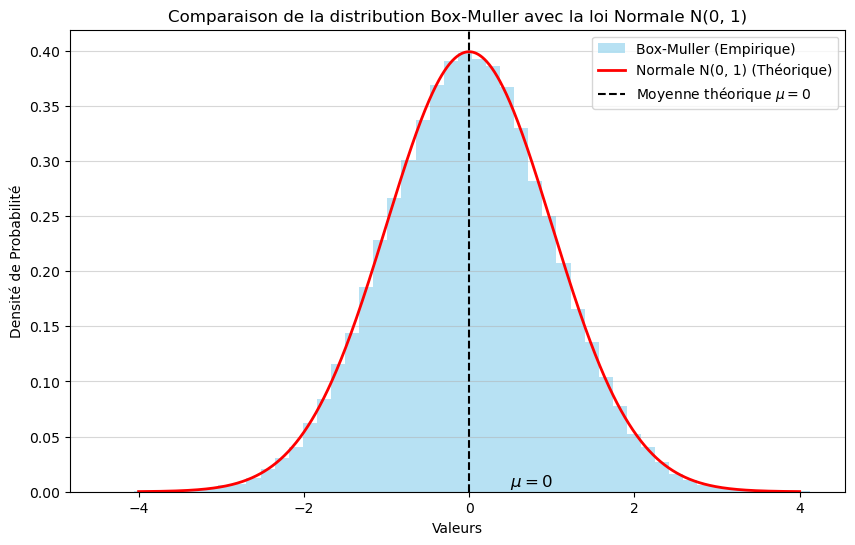

In [125]:
import matplotlib.pyplot as plt
from scipy.stats import norm

# Ajouter la densité théorique (lambda * exp(-lambda * x)) pour comparaison
x_range = np.linspace(-4, 4, 1000)
pdf_theorique = norm.pdf(x_range, loc=0, scale=1)

plt.figure(figsize=(10, 6))

# Histogramme des données générées (Box-Muller)
# L'argument `density=True` est essentiel pour comparer avec la PDF
plt.hist(X_complet, bins=50, density=True, alpha=0.6, color='skyblue', label='Box-Muller (Empirique)')

# Tracé de la courbe de densité théorique N(0, 1)
plt.plot(x_range, pdf_theorique, 'r-', linewidth=2, label='Normale N(0, 1) (Théorique)')


plt.axvline(x=0, color='black', linestyle='--', linewidth=1.5, label=f'Moyenne théorique $\mu={0}$')
plt.text(0 + 0.5, 0.0, f'$\mu=0$', color='black', fontsize=12, verticalalignment='bottom', horizontalalignment='left')

plt.title("Comparaison de la distribution Box-Muller avec la loi Normale N(0, 1)")
plt.xlabel("Valeurs")
plt.ylabel("Densité de Probabilité")
plt.legend()
plt.grid(axis='y', alpha=0.5)
plt.show()

**Q3**. À partir de $N$ échantillons de loi $\mathcal{N}(0,1)$, comment obtenir un $N$ échantillons de loi $\mathcal{N}(\mu, \sigma^2)$ ?

<div style="background-color: rgba(255, 255, 0, 0.15); padding: 8px;">

La méthode pour obtenir $N$ échantillons d'une loi $\mathcal{N}(\mu, \sigma^2)$ à partir de $N$ échantillons d'une loi $\mathcal{N}(0,1)$ repose sur une transformation linéaire simple :

Soit $X$ une variable aléatoire suivant une loi $\mathcal{N}(0, 1)$. La variable transformée $Y$ définie par :
$$Y = \sigma \cdot X + \mu$$
suit une loi Normale de paramètres $\mu$ et $\sigma^2$, c'est-à-dire $Y \sim \mathcal{N}(\mu, \sigma^2)$.

- La multiplication par $\sigma$ (l'écart-type) met à l'échelle la variance ($\text{Var}(\sigma X) = \sigma^2 \text{Var}(X) = \sigma^2 \cdot 1 = \sigma^2$).

- L'addition de $\mu$ (la moyenne) décale la moyenne ($\mathbb{E}[\sigma X + \mu] = \sigma \mathbb{E}[X] + \mu = \sigma \cdot 0 + \mu = \mu$).

</div>

In [120]:
# Construisant une variable Y avec mu=2 et sigma=3 

Y_new=3*X_complet+2

# Vérification de loi normale N(2,9)
moyenne_empirique_y_new = np.mean(Y_new)
variance_empirique_y_new = np.var(Y_new)

print(f"Échantillons générés : {N}")
print("--- Vérification ---")
print(f"Moyennes théoriques) : 2")
print(f"Moyenne empirique Y_new: {moyenne_empirique_y_new:.4f}")
print(f"Variances théoriques : 9")
print(f"Variance empirique Y_new : {variance_empirique_y_new:.4f}")

Échantillons générés : 100000
--- Vérification ---
Moyennes théoriques) : 2
Moyenne empirique Y_new: 2.0071
Variances théoriques : 9
Variance empirique Y_new : 8.9711


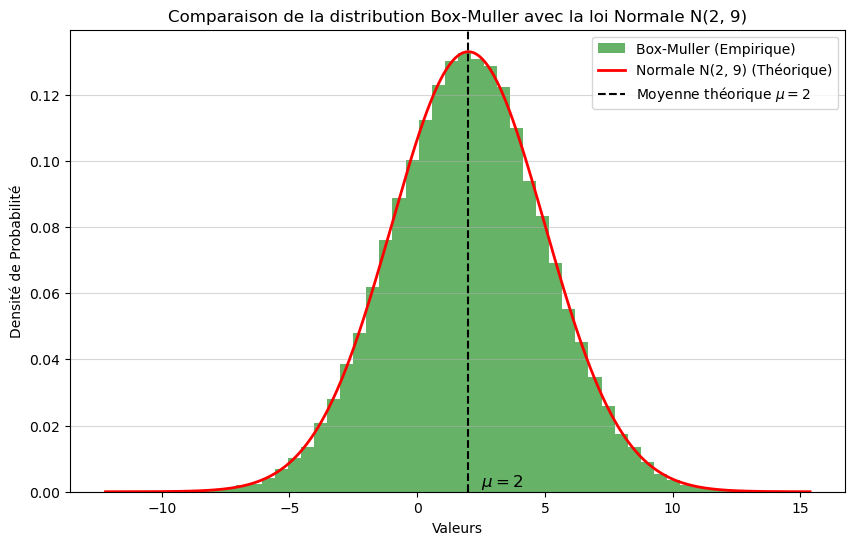

In [127]:
import matplotlib.pyplot as plt
from scipy.stats import norm

mu = 2
sigma = 3

y_range = np.linspace(min(Y_new)-1, max(Y_new)+1, 1000)
pdf_theorique = norm.pdf(y_range, loc=mu, scale=sigma)

plt.figure(figsize=(10, 6))

# Histogramme des données générées (Box-Muller)
# L'argument `density=True` est essentiel pour comparer avec la PDF
plt.hist(Y_new, bins=50, density=True, alpha=0.6, color='green', label='Box-Muller (Empirique)')

# Tracé de la courbe de densité théorique N(0, 1)
plt.plot(y_range, pdf_theorique, 'r-', linewidth=2, label='Normale N(2, 9) (Théorique)')


plt.axvline(x=mu, color='black', linestyle='--', linewidth=1.5, label=f'Moyenne théorique $\mu={mu}$')
plt.text(mu + 0.5, 0.0, f'$\mu=2$', color='black', fontsize=12, verticalalignment='bottom', horizontalalignment='left')

plt.title("Comparaison de la distribution Box-Muller avec la loi Normale N(2, 9)")
plt.xlabel("Valeurs")
plt.ylabel("Densité de Probabilité")
plt.legend()
plt.grid(axis='y', alpha=0.5)
plt.show()

**Q4**. On s'intéresse maintenant à la simulation d'un **vecteur** gaussien en dimension $d$.

Expliquer pourquoi la méthode de Box-Müller permet de simuler des vecteurs de loi $\mathcal{N_d}(\mathbf{0}_d, I_d)$.

Soit $X \sim \mathcal{N_d}(\mathbf{0}_d, I_d)$, $\mathbf{m} \in \mathbb{R}^d$, et $\boldsymbol{\Sigma} \in \mathbb{R}^{d \times d}$ symétrique définie positive. On suppose qu'il existe $\mathbf{L} \in \mathbb{R}^{d \times d}$ tel que $\boldsymbol{\Sigma} = \mathbf{L} \mathbf{L}^{\top}$.

À l'aide des propriétés des vecteurs gaussiens, montrer que $Y = \mathbf{m} + \mathbf{L}X \sim \mathcal{N_d}(\mathbf{m}, \boldsymbol{\Sigma})$.

<div style="background-color: rgba(255, 255, 0, 0.15); padding: 8px;">

### 1. Vecteur Gaussien $\mathcal{N}_d(\mathbf{0}_d, I_d)$ et Box-Muller

La méthode de Box-Muller permet de simuler des vecteurs de loi $\mathcal{N}_d(\mathbf{0}_d, I_d)$ grâce à la propriété fondamentale de cette loi :

Un vecteur aléatoire $\mathbf{X} = (X_1, X_2, \dots, X_d)^{\top} \in \mathbb{R}^d$ suit la loi **$\mathcal{N}_d(\mathbf{0}_d, I_d)$** si et seulement si toutes ses composantes $X_i$ sont des variables aléatoires **indépendantes** et suivent chacune une loi **Normale standard $\mathcal{N}(0, 1)$**.

1.  **Box-Muller est une génératrice de $\mathcal{N}(0, 1)$**: La méthode de Box-Muller (ou toute autre méthode comme l'inversion) permet de générer des échantillons de la loi $\mathcal{N}(0, 1)$.
2.  **Simulation du vecteur**: Pour simuler un vecteur $\mathbf{X} \sim \mathcal{N}_d(\mathbf{0}_d, I_d)$, il suffit de générer **$d$ échantillons $\mathcal{N}(0, 1)$ indépendants**, $X_1, X_2, \dots, X_d$, en utilisant $d$ fois la méthode de Box-Muller (ou en utilisant $\lceil d/2 \rceil$ paires de tirages Box-Muller), et de les organiser en un vecteur $\mathbf{X}$.

**En résumé :** Le vecteur $\mathcal{N}_d(\mathbf{0}_d, I_d)$ est simplement un vecteur de $d$ composantes $\mathcal{N}(0, 1)$ indépendantes. La méthode de Box-Muller nous donne ces composantes.


### 2. Dérivation de la Transformation Générale $Y = \mathbf{m} + \mathbf{L}X$

Si $\mathbf{X}$ est un vecteur gaussien et $\mathbf{A}$ est une matrice constante, alors le vecteur $\mathbf{Y} = \mathbf{b} + \mathbf{A}\mathbf{X}$ est également un **vecteur gaussien**.

Puisque $\mathbf{X}$ est gaussien et que $\mathbf{Y}$ est une transformation linéaire de $\mathbf{X}$ (avec $\mathbf{A}=\mathbf{L}$ et $\mathbf{b}=\mathbf{m}$), $\mathbf{Y}$ est nécessairement un vecteur gaussien. 
#### Calcul de l'Espérance
L'espérance d'une transformation linéaire est :
$$\mathbb{E}[\mathbf{Y}] = \mathbb{E}[\mathbf{m} + \mathbf{L}\mathbf{X}]$$
Par linéarité de l'espérance ($\mathbb{E}[\mathbf{A}\mathbf{X} + \mathbf{b}] = \mathbf{A}\mathbb{E}[\mathbf{X}] + \mathbf{b}$) :
$$\mathbb{E}[\mathbf{Y}] = \mathbf{m} + \mathbf{L} \mathbb{E}[\mathbf{X}]$$
Puisque $\mathbf{X} \sim \mathcal{N}_d(\mathbf{0}_d, I_d)$, son espérance $\mathbb{E}[\mathbf{X}] = \mathbf{0}_d$.
$$\mathbb{E}[\mathbf{Y}] = \mathbf{m} + \mathbf{L} \cdot \mathbf{0}_d = \mathbf{m}$$

#### Calcul de la Matrice de Covariance
La matrice de covariance d'une transformation linéaire est :
$$\text{Cov}(\mathbf{Y}) = \text{Cov}(\mathbf{m} + \mathbf{L}\mathbf{X})$$
Étant donné que l'addition d'un vecteur constant ($\mathbf{m}$) ne modifie pas la covariance :
$$\text{Cov}(\mathbf{Y}) = \text{Cov}(\mathbf{L}\mathbf{X})$$
La formule générale pour la covariance d'une transformation linéaire $\mathbf{A}\mathbf{X}$ est $\mathbf{A} \text{Cov}(\mathbf{X}) \mathbf{A}^{\top}$ :
$$\text{Cov}(\mathbf{Y}) = \mathbf{L} \text{Cov}(\mathbf{X}) \mathbf{L}^{\top}$$
Puisque $\mathbf{X} \sim \mathcal{N}_d(\mathbf{0}_d, I_d)$, sa matrice de covariance $\text{Cov}(\mathbf{X}) = I_d$ (la matrice identité).
$$\text{Cov}(\mathbf{Y}) = \mathbf{L} I_d \mathbf{L}^{\top} = \mathbf{L} \mathbf{L}^{\top}$$
Par hypothèse, nous avons $\boldsymbol{\Sigma} = \mathbf{L} \mathbf{L}^{\top}$ (où $\mathbf{L}$ est souvent le facteur de Cholesky de $\boldsymbol{\Sigma}$).
$$\text{Cov}(\mathbf{Y}) = \boldsymbol{\Sigma}$$

#### Conclusion
On a donc:$$\mathbf{Y} \sim \mathcal{N}_d(\mathbf{m}, \boldsymbol{\Sigma})$$


</div>

**Q5**. On peut montrer qu'une telle matrice $\mathbf{L}$ existe toujours. C'est la **décomposition de Cholesky** ($\mathbf{L}$ est triangulaire inférieure), qui est fondamentale en statistique et *machine learning*. Elle tire son nom d'André-Louis Cholesky, ingénieur polytechnicien, mort pendant la première guerre mondiale (résultat publié de manière posthume en 1924). À noter que la complexité associée à cette décomposition est $\mathcal{O}(d^3)$ !

À partir de $N$ échantillons de loi $\mathcal{N_d}(\mathbf{0}_d, I_d)$, générer $N$ échantillons de loi $\mathcal{N_d}(\mathbf{m}, \boldsymbol{\Sigma})$. Prendre $d=2$ et utiliser `np.linalg.cholesky`.

In [152]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

N = 100000 
d = 2 

# Vecteur de moyenne théorique (m)
m_theorique = np.array([5, -3]) 
# Matrice de covariance théorique (Sigma)
# Note: Elle doit être symétrique définie positive.
Sigma_theorique = np.array([
    [4.0, 1.5], # Var(X1)=4.0, Cov(X1, X2)=1.5
    [1.5, 1.0]  # Cov(X2, X1)=1.5, Var(X2)=1.0
])

# Décomposition de Cholesky 
# Calcul de la matrice L telle que Sigma = L @ L.T
L = np.linalg.cholesky(Sigma_theorique)

print("Paramètres :")
print(f"Vecteur Moyenne m: {m_theorique}")
print(f"Matrice de Covariance Σ:\n{Sigma_theorique}")
print(f"Matrice de Cholesky L:\n{L}")

Paramètres :
Vecteur Moyenne m: [ 5 -3]
Matrice de Covariance Σ:
[[4.  1.5]
 [1.5 1. ]]
Matrice de Cholesky L:
[[2.         0.        ]
 [0.75       0.66143783]]


In [147]:
# Génération de X de loi N_d(0, I) par la méthode de Box-Müller
l = 1/2 
a,b= 0, 2*np.pi
X_d = np.zeros((N, d))
for dim in range(d):
    U_r = np.random.rand(N//2)
    U_teta = np.random.rand(N//2)   
    R = (-1/l) * np.log(U_r)
    teta = a + (b - a) * U_teta    
    X= np.sqrt(R)*np.cos(teta)
    Y= np.sqrt(R)*np.sin(teta)
    X_complet_dim = np.concatenate((X, Y))
    X_d[:, dim] = X_complet_dim

# Transformation Linéaire Y = m + L @ X
Y_vecteur_gaussien = X_d @ L.T + m_theorique

# Vérification du Vecteur Moyenne (doit être proche de [0, 0])
moyenne_empirique_vecteur = np.mean(X_d, axis=0)

# Vérification de la Matrice de Covariance (doit être proche de la Matrice Identité I2)
covariance_empirique_matrix = np.cov(X_d, rowvar=False)

print(f"Échantillons générés : {N}")
print(f"Moyennes théoriques) : [0.0000, 0.0000]")
print(f"Moyenne empirique X_d: {moyenne_empirique_vecteur.round(4)}")
print(f"\nCovariance théorique : Matrice Identité I2")
print("Matrice de Covariance empirique:")
print(covariance_empirique_matrix.round(4))


m_empirique = np.mean(Y_vecteur_gaussien, axis=0)
Sigma_empirique = np.cov(Y_vecteur_gaussien, rowvar=False)

print("\nVérification pour Y = m + L @ X")
print(f"Moyenne Théorique (m)  : {m_theorique}")
print(f"Moyenne Empirique      : {m_empirique.round(4)}")
print(f"\nCovariance Théorique (Σ):\n{Sigma_theorique}")
print(f"Covariance Empirique    :\n{Sigma_empirique.round(4)}")


Échantillons générés : 100000
Moyennes théoriques) : [0.0000, 0.0000]
Moyenne empirique X_d: [0.0003 0.0048]

Covariance théorique : Matrice Identité I2
Matrice de Covariance empirique:
[[ 1.0034e+00 -9.0000e-04]
 [-9.0000e-04  9.9850e-01]]

Vérification pour Y = m + L @ X
Moyenne Théorique (m)  : [ 5 -3]
Moyenne Empirique      : [ 5.0005 -2.9966]

Covariance Théorique (Σ):
[[4.  1.5]
 [1.5 1. ]]
Covariance Empirique    :
[[4.0134 1.5039]
 [1.5039 1.0003]]


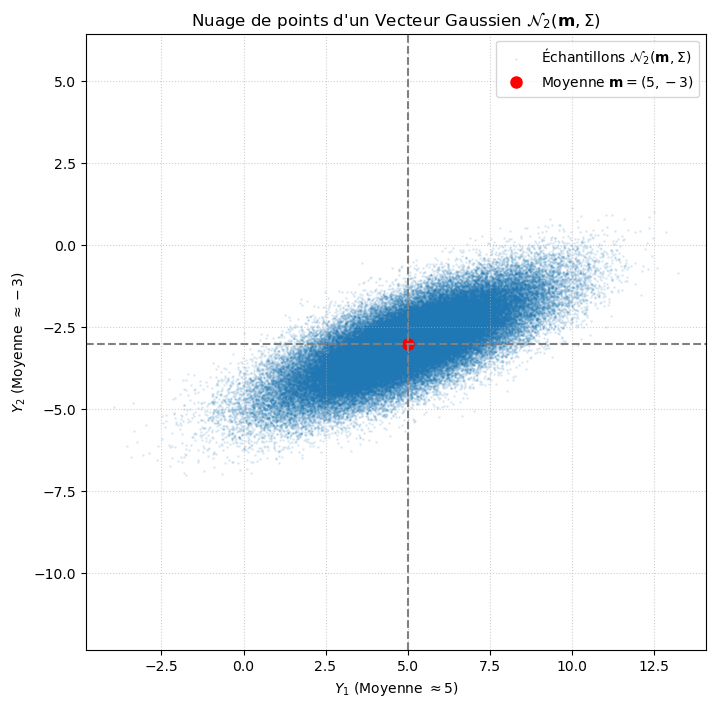

In [148]:
# Visualisation 2D 
Y1 = Y_vecteur_gaussien[:, 0] # Première composante (X-axis)
Y2 = Y_vecteur_gaussien[:, 1] # Deuxième composante (Y-axis)

plt.figure(figsize=(8, 8))
# Utilisation de l'alpha pour visualiser la densité des points
plt.scatter(Y1, Y2, alpha=0.1, s=1, label='Échantillons $\mathcal{N}_2(\\mathbf{m}, \Sigma)$')

# Affichage du centre de la distribution
plt.plot(m_theorique[0], m_theorique[1], 'ro', markersize=8, label='Moyenne $\\mathbf{m}=(5, -3)$')

plt.title("Nuage de points d'un Vecteur Gaussien $\mathcal{N}_2(\\mathbf{m}, \Sigma)$")
plt.xlabel("$Y_1$ (Moyenne $\\approx 5$)")
plt.ylabel("$Y_2$ (Moyenne $\\approx -3$)")
plt.axvline(m_theorique[0], color='gray', linestyle='--')
plt.axhline(m_theorique[1], color='gray', linestyle='--')
plt.legend()
plt.grid(True, linestyle=':', alpha=0.6)
plt.axis('equal') # Pour que l'ellipse ne soit pas déformée
plt.show()

### Exercice 4 - Acceptation-Rejet (*Rejection sampling*)

**Q1**. On considère la loi Bêta, dont la densité sur $[0,1]$ est
$$f(x;\alpha, \beta) = \frac{\Gamma(\alpha + \beta)}{\Gamma(\alpha) \Gamma(\beta)} x^{\alpha-1} (1-x)^{\beta-1} \quad \alpha > 0, \quad \beta > 0.$$

On souhaite obtenir des échantillons de la loi Bêta dans le cas suivant : $\alpha = 2, \beta = 2$.
* Expliquer pourquoi il est difficile de mettre en place la méthode de la transformée inverse.
* Quelle loi très simple peut-on utiliser comme loi instrumentale ?
* Implémenter alors un algorithme acceptation-rejet pour obtenir $N = 10000$ échantillons.
* Comparer la proportion empirique d'échantillons acceptés avec sa valeur théorique.
* Quelle difficulté rencontre-t-on pour le cas $\alpha = \beta = 0.5$ ?

<div style="background-color: rgba(255, 255, 0, 0.15); padding: 8px;">

Dans le cas $\alpha=2$ et $\beta=2$, la densité Bêta simplifiée sur $[0,1]$ est :

$$f(x) = \frac{\Gamma(2+2)}{\Gamma(2) \Gamma(2)} x^{2-1} (1-x)^{2-1} = \frac{3!}{1! 1!} x(1-x) = 6x(1-x)$$

* La méthode de la Transformée Inverse nécessite de pouvoir calculer la **fonction de répartition (CDF)** $F(x)$ et son inverse $F^{-1}(u)$.
    * La CDF est :
        $$F(x) = \int_0^x 6t(1-t) dt = 6 \int_0^x (t - t^2) dt = 6 \left[ \frac{t^2}{2} - \frac{t^3}{3} \right]_0^x = 3x^2 - 2x^3$$
    * La difficulté réside dans le fait que pour obtenir la loi inverse, on doit résoudre l'équation :
        $$u = 3x^2 - 2x^3 \quad \text{pour } x$$
        C'est une **équation polynomiale de degré 3**. Il existe des formules générales pour les solutions, mais elles sont **complexes** et impliquent des racines cubiques et des nombres complexes, ce qui rend l'implémentation numérique **peu pratique et coûteuse** en temps de calcul. C'est pourquoi on cherche une méthode alternative.


La loi instrumentale $Q(x)$ doit être **facile à échantillonner** et doit avoir un **support identique ou plus large** que la loi cible $P(x)$. La loi Bêta est définie sur $[0,1]$.

* La loi la plus simple à échantillonner sur l'intervalle $[0,1]$ est la **loi Uniforme continue** $\mathcal{U}(0, 1)$.
* Sa densité est $q(x) = 1$ pour $x \in [0,1]$.

Pour que la méthode d'acceptation-rejet fonctionne, il faut trouver la plus petite constante $M$ telle que :
$$M \cdot Q(x) \geq f(x) \quad \text{pour tout } x \in [0,1]$$

Dans notre cas, $Q(x) = 1$, donc nous cherchons $M$ tel que :
$$M \geq f(x) = 6x(1-x) \quad \text{pour tout } x \in [0,1]$$

Il suffit donc de trouver la **valeur maximale** de la fonction $f(x)$ sur $[0,1]$.

1.  $$f'(x) = \frac{d}{dx} (6x - 6x^2) = 6 - 12x$$
2.  $f'(x) = 0 \implies 6 - 12x = 0 \implies x = 1/2$.
3.  On Évalue la fonction en $x=1/2$ :
    $$f(1/2) = 6 \left(\frac{1}{2}\right) \left(1 - \frac{1}{2}\right) = 6 \cdot \frac{1}{4} = \frac{3}{2} = 1.5$$

Par conséquent, la constante minimale que nous pouvons choisir est $\mathbf{M = 1.5}$.

</div>

In [149]:
from scipy.stats import beta # Pour la densité Bêta théorique normalisée
from scipy.special import gamma
N_TARGET = 1e6 
ALPHA=2
BETA=2
M=1.5
C = gamma(ALPHA + BETA) / (gamma(ALPHA) * gamma(BETA)) # Constante de normalisation (C=6)

def f(x,alpha,beta):
    return (C*x**(alpha-1)*(1-x)**(beta-1))

def q(x):
    return 1.0

accepted_samples = []
total_proposals = 0

print(f"Démarrage de l'Acceptation-Rejet. Objectif : {N_TARGET} échantillons acceptés.")

while len(accepted_samples) < N_TARGET:
    
    x_0 = np.random.uniform(0, 1) 
    
    u = np.random.uniform(0, M*q(x_0))
    
    # Compter la tentative
    total_proposals += 1
    
    # Test d'Acceptation/Rejet
    if u <= f(x_0,2,2):
        # ACCEPTATION
        accepted_samples.append(x_0)
        

print(f"Terminé. {len(accepted_samples)} échantillons acceptés.")

print(f"Taux d'acceptation théorique  : {1/M}")
print(f"Taux d'acceptation empirique  : {len(accepted_samples)/total_proposals}")

Démarrage de l'Acceptation-Rejet. Objectif : 1000000.0 échantillons acceptés.
Terminé. 1000000 échantillons acceptés.
Taux d'acceptation théorique  : 0.6666666666666666
Taux d'acceptation     : 0.666845381228836


<div style="background-color: rgba(255, 255, 0, 0.15); padding: 8px;">

Le taux d'acceptation théorique $\rho$ d'un algorithme d'acceptation-rejet est donné par l'inverse de la constante $M$:
$$\rho_{\text{théorique}} = \frac{1}{M}$$

On calcule le rapport:
$$\rho_{\text{empirique}} = \frac{\text{Nombre total d'échantillons acceptés}}{\text{Nombre total d'échantillons proposés}}$$

On remarque que: $\rho_{\text{empirique}}$ et $\rho_{\text{théorique}}$ sont presque égales!

---
Pour le cas  $\alpha = \beta = 0.5$, la loi Bêta est une distribution en forme de **U** (la distribution Arc-sinus). La densité non normalisée est :
$$f(x) \propto x^{0.5-1} (1-x)^{0.5-1} = \frac{1}{\sqrt{x(1-x)}}$$

* La fonction $f(x)$ **tend vers l'infini** lorsque $x \to 0$ et $x \to 1$.
* Si on utilise la loi $\mathcal{U}(0, 1)$ comme instrumentale, on cherche $\mathbf{M = \sup_{x} f(x)}$. Comme la fonction $f(x)$ n'est pas bornée sur l'intervalle $[0,1]$, la borne supérieure est **infinie** ($M=\infty$).
* **Conclusion :** La loi Uniforme $\mathcal{U}(0, 1)$ **ne peut pas être utilisée** comme loi instrumentale pour le cas $\alpha = \beta = 0.5$ car la condition $M \cdot Q(x) \geq f(x)$ ne peut être satisfaite par une constante $M$ finie. Il faudrait choisir une loi instrumentale $Q(x)$ dont les "queues" (ses valeurs aux bornes 0 et 1) sont plus lourdes ou au moins aussi lourdes que celles de la loi Bêta.

</div>

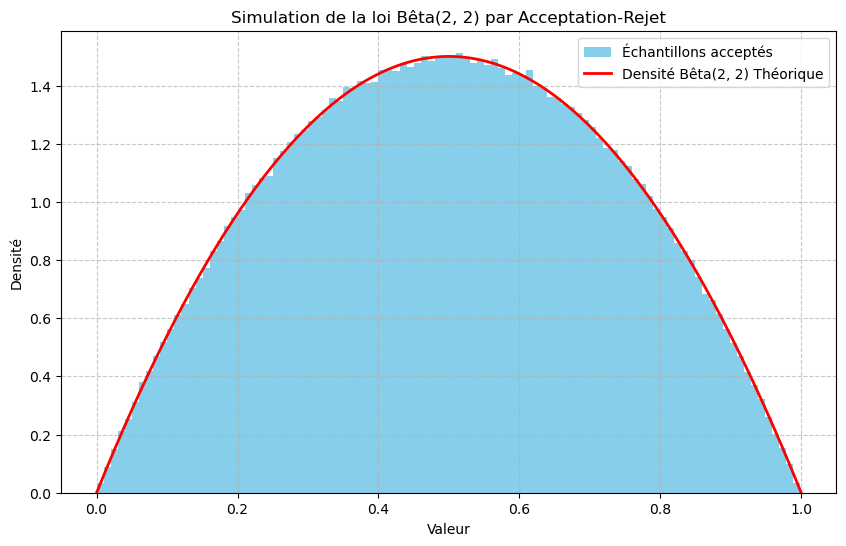

In [93]:
import numpy as np
import matplotlib.pyplot as plt


plt.figure(figsize=(10, 6))
plt.hist(accepted_samples, bins=100, density=True, alpha=1, color='skyblue', label='Échantillons acceptés')

# Générer les points pour la densité Bêta théorique
x_range = np.linspace(0, 1, 500) # La loi Bêta est sur [0, 1]
pdf_theorique = beta.pdf(x_range, ALPHA, BETA) # Densité Bêta normalisée
plt.plot(x_range, pdf_theorique, 'r-', linewidth=2, label=f'Densité Bêta({ALPHA}, {BETA}) Théorique')

plt.title(f"Simulation de la loi Bêta({ALPHA}, {BETA}) par Acceptation-Rejet")
plt.xlabel("Valeur")
plt.ylabel("Densité")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

**Q2**. On souhaite maintenant obtenir des échantillons d'une loi gaussienne tronquée, i.e., une loi normale restreinte à un certain intervalle (en 1D), ou un certain pavé de l'espace (pour le cas multivarié).

On considère le cas d'une gaussienne multivariée $\mathcal{N}_d(0, I_d)$ que l'on tronque sur le pavé $[-1,2]^d$. On prendra comme loi instrumentale la loi $\mathcal{N}(0, I_d)$ (i.e., non tronquée)

* Justifier ce choix de loi instrumentale.
* Pour le cas univarié ($d=1$), calculer numériquement la probabilité d'acceptation de l'algorithme acceptation-rejet. On pourra utiliser `scipy.stats.cdf`.
* Que devient cette probabilité pour $d=10$ ? $d=100$ ? Conclure quant à la faiblesse fondamentale de l'algorithme acceptation-rejet.

<div style="background-color: rgba(255, 255, 0, 0.15); padding: 8px;">

### 1\. Justification du Choix de la Loi Instrumentale

Nous cherchons à échantillonner la loi cible $P(x)$, qui est une Gaussienne multivariée $\mathcal{N}_d(0, I_d)$ tronquée sur le pavé $\mathcal{A} = [-1, 2]^d$.

  * **Loi Cible ($P(x)$) :**
    $$P(x) = \frac{1}{Z} \cdot f(x) \cdot \mathbf{1}_{x \in \mathcal{A}}$$
    où $f(x)$ est la densité de $\mathcal{N}_d(0, I_d)$ et $Z$ est la constante de normalisation (la probabilité que la Gaussienne tombe dans $\mathcal{A}$).
  * **Loi Instrumentale ($Q(x)$) :** Nous choisissons la loi **non tronquée** $\mathcal{N}_d(0, I_d)$.

Le choix de $Q(x) = \mathcal{N}_d(0, I_d)$ est justifié par les deux critères de l'Acceptation-Rejet :

1.  **Facilité d'échantillonnage :** La loi $\mathcal{N}_d(0, I_d)$ est l'une des lois les plus simples à échantillonner par ordinateur (il suffit de générer $d$ variables $\mathcal{N}(0, 1)$ indépendantes).
2.  **Condition d'enveloppe :** Nous devons trouver $M$ tel que $M \cdot Q(x) \geq P(x)$ pour tout $x$.
      * À l'intérieur du pavé $\mathcal{A}$, la densité $P(x)$ est la densité de $\mathcal{N}_d(0, I_d)$ divisée par la constante de normalisation $Z$, soit $P(x) = \frac{1}{Z} Q(x)$.
      * À l'extérieur du pavé, $P(x) = 0$.
      * La condition est satisfaite avec $\mathbf{M = 1/Z}$, car :
        $$M \cdot Q(x) = \frac{1}{Z} Q(x) \geq P(x)$$
      * En choisissant $M=1/Z$, l'enveloppe est **exacte** à l'intérieur de $\mathcal{A}$, et l'algorithme d'acceptation-rejet se réduit à :
        $$\text{Accepter } x^* \text{ si } x^* \in \mathcal{A}$$

---
### 2\. Calcul Numérique de la Probabilité d'Acceptation ($\rho$)

La probabilité d'acceptation $\rho$ est égale à l'inverse de la constante $M$, soit $\rho = 1/M$. Dans ce cas spécifique, $\rho$ est simplement la **probabilité** que la loi instrumentale $\mathcal{N}_d(0, I_d)$ tombe dans la région de troncature $\mathcal{A} = [-1, 2]^d$.

$$\rho = P(X \in \mathcal{A}) = P(X_1 \in [-1, 2], X_2 \in [-1, 2], \dots, X_d \in [-1, 2])$$

Comme les composantes $X_i \sim \mathcal{N}(0, 1)$ sont indépendantes :

$$\rho = \prod_{i=1}^d P(X_i \in [-1, 2]) = \left( P(X \in [-1, 2]) \right)^d$$

où $X \sim \mathcal{N}(0, 1)$.

#### Cas Univarié ($d=1$)

Pour $d=1$, $\rho_1 = P(X \in [-1, 2])$. Nous utilisons la fonction de répartition (CDF) $\Phi$ de la loi $\mathcal{N}(0, 1)$ (fournie par `scipy.stats.norm.cdf`):

$$\rho_1 = \Phi(2) - \Phi(-1) \approx 0.8156$$


In [157]:
import numpy as np
from scipy.stats import norm

# Calcul numérique pour d=1
d1_prob = norm.cdf(2) - norm.cdf(-1)

print(f"La probabilité d'acceptation pour d=1 est : {d1_prob}")

La probabilité d'acceptation pour d=1 est : 0.8185946141203637


<div style="background-color: rgba(255, 255, 0, 0.15); padding: 8px;">

### 3\. Probabilité d'Acceptation en Haute Dimension

Pour $d$ dimensions, la probabilité d'acceptation est : $\rho_d = \rho_1^d$.
</div>

In [155]:
# Calcul pour d=10
d10_prob = d1_prob**10

# Sortie :
print(f"La probabilité d'acceptation pour d=10 est : {d10_prob}")

# Calcul pour d=100
d100_prob = d1_prob**100

# Sortie :
print(f"La probabilité d'acceptation pour d=100 est : {d100_prob}")

La probabilité d'acceptation pour d=10 est : 0.13511041536466953
La probabilité d'acceptation pour d=100 est : 2.0271612279721044e-09


<div style="background-color: rgba(255, 255, 0, 0.15); padding: 8px;">

#### Cas $d=10$

$$\rho_{10} = (\Phi(2) - \Phi(-1))^{10} \approx (0.8186)^{10}$$



Dans ce cas, environ **12.3%** des échantillons proposés seront acceptés. L'algorithme est encore utilisable, mais il y a déjà un facteur de rejet de $1/0.1232 \approx 8.1$ (on propose 8.1 échantillons pour en accepter 1).


#### Cas $d=100$

$$\rho_{100} = (\Phi(2) - \Phi(-1))^{100} \approx (0.8186)^{100}$$



Dans ce cas, l'algorithme est pratiquement **inutilisable**. On propose un échantillon pour chaque $1/\rho_{100} \approx 79.37$ **millions** d'échantillons proposés.

---
### 4\. Conclusion sur la Faiblesse de l'Acceptation-Rejet

Les résultats précédents illustrent la **faiblesse fondamentale** de l'algorithme d'Acceptation-Rejet : le **fléau de la dimensionnalité** (Curse of Dimensionality).

  * **Le Problème :** Lorsque la dimension $d$ augmente, la probabilité $\rho$ de tomber dans une région fixée $\mathcal{A}$ diminue exponentiellement ($\rho_d = \rho_1^d$ où $\rho_1 < 1$).
  * **L'Implication :** La constante d'enveloppe $M = 1/\rho_d$ augmente **exponentiellement**.
  * **Conséquence :** Le taux de rejet augmente exponentiellement et la méthode devient **extrêmement inefficace** (le temps de calcul tend vers l'infini pour générer un nombre fini d'échantillons).

Pour la simulation en haute dimension, on préfère donc les méthodes basées sur les **Chaînes de Markov Monte Carlo (MCMC)** comme l'algorithme de Metropolis-Hastings ou l'échantillonneur de Gibbs, qui ne dépendent pas de l'existence d'une enveloppe uniforme bornée $M$.
</div>

### Exercice 5 - Estimation de $\pi$ par Monte Carlo

On rappelle que $\pi$ est égal à la surface d'un cercle de rayon 1, i.e.
$$ \pi = \int_{-1}^1 \int_{-1}^1 \mathbb{1}_{x^2 + y^2 \leq 1}(x,y) dx dy.$$

Ce qui peut se réécrire comme
$$ \pi = 4 \int_{-1}^1 \int_{-1}^1 \mathbb{1}_{x^2 + y^2 \leq 1}(x,y) p(x) p(y) dx dy.$$
Où $p(x)$ et $p(y)$ sont les densités de la loi uniforme sur $[-1,1]$.

* En déduire l'esimtateur de Monte Carlo de $\pi$.
* Générer $N_s = 10000$ échantillons, puis représenter l'évolution de la valeur de l'estimation par Monte Carlo de $\pi$ en ne gardant que les $N$ premiers. Quel résultat fondamental est-on en train d'illustrer ?
* Faire 1000 simulations de l'estimation par Monte Carlo de $\pi$ avec $N_s = 10000$ échantillons, et vérifier le résultat de convergence en loi de l'estimateur de Monte Carlo donné par le TCL.

<div style="background-color: rgba(255, 255, 0, 0.15); padding: 8px;">
Votre réponse ici
</div>

In [ ]:
########
### YOUR CODE HERE
########

### Exercice 6 - Échantillonnage d'importance (*Importance sampling*)

On cherche à estimer $\mathbb{P}(X > 3)$ avec $X \sim \mathcal{N}(0,1)$.

* Ré-écrire cette probabilité comme une intégrale et en déduire l'estimateur de Monte Carlo "standard".
* Simuler $1000$ fois $N_s = 10000$ échantillons, et calculer la moyenne et la variance empiriques de l'estimateur de Monte Carlo standard.
* On souhaite maintenant implémenter un schéma d'échantillonnage d'importance en utilisant comme loi instrumentale $\mathcal{N}(4,1)$. Donner l'estimateur de Monte Carlo associé.
* De même, simuler $1000$ fois $N_s = 10000$ échantillons, et calculer la moyenne et la variance empiriques de de deuxième estimateur.
* Quantifier la réduction de variance. Commenter.

<div style="background-color: rgba(255, 255, 0, 0.15); padding: 8px;">
Votre réponse ici
</div>

In [ ]:
########
### YOUR CODE HERE
########